In [1]:
import numpy as np
import pylab
import scipy.stats as stats
from scipy.stats import shapiro, bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

In [2]:
f = np.array([173, 175, 180, 178, 177, 185, 183, 182])
h = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
w = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

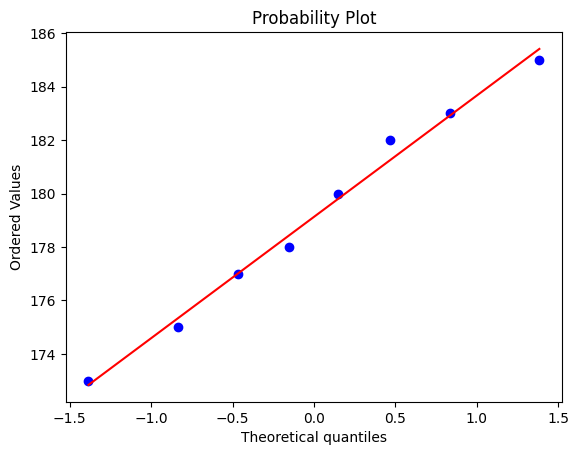

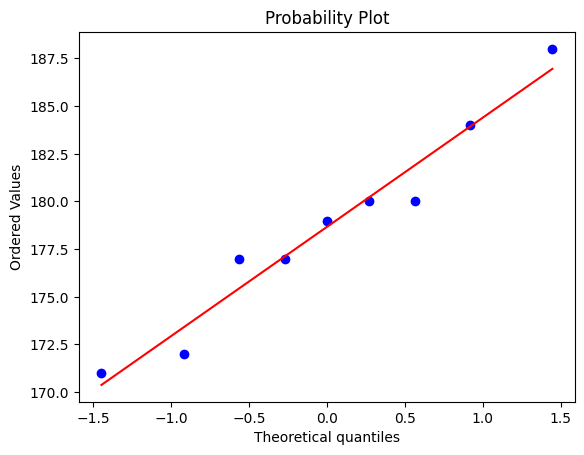

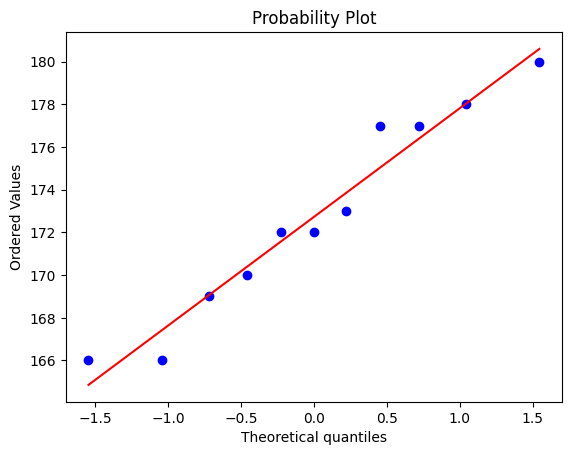

In [3]:
stats.probplot(f, dist="norm", plot=pylab)
pylab.show()
stats.probplot(h, dist="norm", plot=pylab)
pylab.show()
stats.probplot(w, dist="norm", plot=pylab)
pylab.show()

In [4]:
stat,p = shapiro(f)
stat,p

(0.9775082468986511, 0.9495404362678528)

In [5]:
stat,p = shapiro(h)
stat,p

(0.9579196572303772, 0.7763139009475708)

In [6]:
stat,p = shapiro(w)
stat,p

(0.9386808276176453, 0.5051165223121643)

In [7]:
stats.kruskal(f,h,w)

KruskalResult(statistic=7.897493213863828, pvalue=0.01927885061595347)

In [8]:
bartlett(f,h,w)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

In [9]:
stats.f_oneway(f,h,w)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698693)

In [10]:
df = pd.DataFrame({"height":[173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177,
       172, 171, 184, 180, 172, 173, 169, 177, 166, 180, 178, 177, 172,
       166, 170],"group":np.repeat(["f","h","w"],repeats=[8,9,11])})
tukey = pairwise_tukeyhsd(df["height"], df["group"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     f      h  -0.4583  0.979  -6.2732  5.3566  False
     f      w  -6.3977 0.0219 -11.9583 -0.8372   True
     h      w  -5.9394 0.0284 -11.3181 -0.5607   True
-----------------------------------------------------
